In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tickers = ['AAPL','MSFT','IBM']
p = get_pricing(tickers,'2006-01-01','2011-01-01')

In [3]:
def calc_signals(tickers,p,a,b):
    sma = p['price'].rolling(a).mean()
    smb = p['price'].rolling(b).mean()
    signal = np.sign(sma - smb).diff()
    actual_signals = signal[signal!=0].dropna(how='all',axis=0)
    for col in actual_signals.columns:
        idx = actual_signals[col].first_valid_index()
        signal[col][idx] = signal[col][idx]/2

    return signal

sig = calc_signals(tickers,p,10,20)



In [4]:
def calc_pnl(sig,p):
    return (sig*p['price']).sum()
    
calc_pnl(sig,p).sum()

301.3079999999999

In [5]:
def optimize(tickers,p,vals,N):
    pnls = []
    for i in range(N):
        a = min(vals[i])
        b = max(vals[i])
        try:
            sig = calc_signals(tickers,p,a,b)
            pnls.append(calc_pnl(sig,p).sum())
        except:
            pnls.append(np.nan)
    return pnls

#N = 1000
#vals = np.array([np.random.randint(10,100,(N,)),np.random.randint(10,100,(N,))]).T
#pnls = optimize(tickers,p,vals,N)
#plt.hist(pnls,40)

In [20]:
N = 5000
vals = np.array([np.random.randint(5,30,(N,)) for i in range(len(tickers))]).T
p = get_pricing(tickers,'2006-01-01','2015-01-01')
pnls1 = optimize(tickers,p,vals,N)
p = get_pricing(tickers,'2015-01-01','2017-05-01')
pnls2 = optimize(tickers,p,vals,N)

print len(pnls1),len(pnls2)

5000 5000


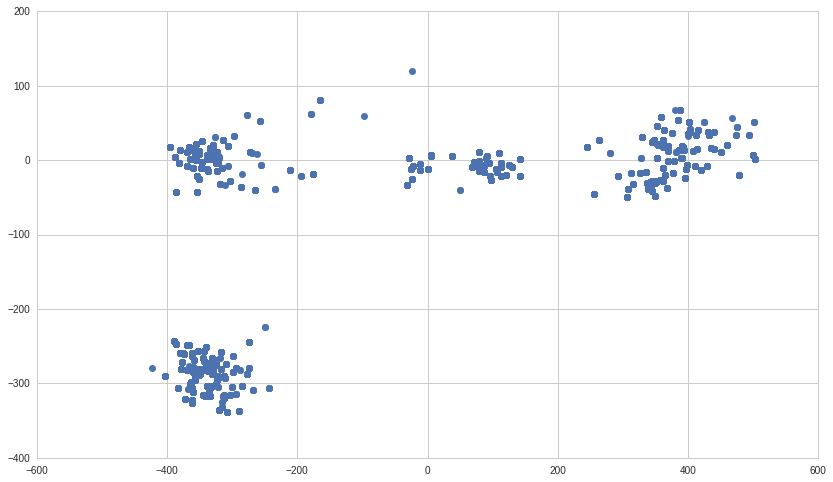

In [21]:
plt.plot(pnls1,pnls2,'o')